In [21]:
import pandas as pd
%matplotlib inline

In [8]:
data=pd.read_csv('code/data.csv')

In [4]:
basecapacity=1
capacity=basecapacity/100.

capacityBoughtSold=[]
while capacity < 1e6:
    charge=0

    bought_without=0
    bought_with=0
    sold_without=0
    sold_with=0
    d=data.iloc[0]
    for (i,d) in data[1:].iterrows():
        delta=d.delta

        oldCharge=charge
        
        if delta > 0:
            # Sovraproduzione
            sold_without+=delta
            charge += delta
            if charge > capacity:
                sold_with += charge-capacity
                charge=capacity
        else:
            # Sottoproduzione
            bought_without+=-delta
            charge += delta
            if charge < 0:
                bought_with += -charge
                charge = 0

    capacityBoughtSold.append((capacity,bought_with,sold_with))
    print("Capacity %s bought %s sold %s" % (capacity, bought_with, sold_with))
    basecapacity*=2
    capacity=basecapacity/100.

Capacity 0.01 bought 6904.1599999998925 sold 7121.1499999999205
Capacity 0.02 bought 6887.96999999987 sold 7104.959999999889
Capacity 0.04 bought 6858.6200000001745 sold 7075.610000000172
Capacity 0.08 bought 6806.470000000183 sold 7023.460000000175
Capacity 0.16 bought 6716.270000000218 sold 6933.2600000002085
Capacity 0.32 bought 6560.440000000166 sold 6777.430000000177
Capacity 0.64 bought 6281.440000000046 sold 6498.430000000032
Capacity 1.28 bought 5757.25000000008 sold 5974.030000000121
Capacity 2.56 bought 4804.900000000061 sold 5020.400000000043
Capacity 5.12 bought 3717.500000000049 sold 3930.440000000046
Capacity 10.24 bought 3201.3500000000076 sold 3409.1700000000096
Capacity 20.48 bought 3073.7699999999995 sold 3271.350000000001
Capacity 40.96 bought 2985.0000000000005 sold 3162.1000000000013
Capacity 81.92 bought 2862.0600000000013 sold 2998.2000000000025
Capacity 163.84 bought 2616.3000000000015 sold 2670.5200000000027
Capacity 327.68 bought 2268.8100000000013 sold 2159.1

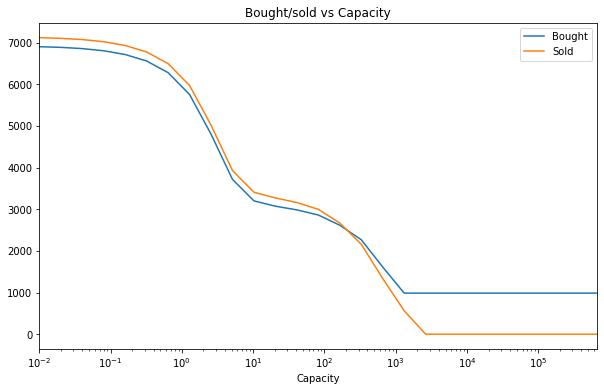

In [25]:
result=pd.DataFrame(capacityBoughtSold,columns=["Capacity","Bought","Sold"])

result.set_index("Capacity",inplace=True)

result.plot(logx=True,figsize=(10,6),title="Bought/sold vs Capacity");